In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
# monomials are polynomials of multivariate data
# x_1^2x_2 example of deg 3

In [5]:
# weight decay restricts the values that the parameters can take
# the simplest we can measure a function is by the distance of its params from zero
# to ensure small weight vector, add the norm of the weight vector as a penalty term 
# new objective: minimize the sum of the prediction loss AND penalty term
# if weight vector grows too large, learning algorithm focuses on minimizing weight norm rather than training error

In [9]:
# add regularization constant lambda to weigh how much it factors loss vs weight norm
# L(w, b) + lambda/2 ||w||^2
# larger values of lambda constrain w very much

In [8]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [10]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [14]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) +
                self.lambd * l2_penalty(self.w)) # append the penalty

In [12]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

L2 norm of w: 0.011863082647323608


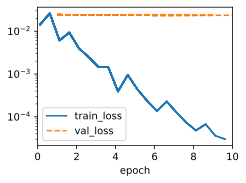

In [13]:
train_scratch(0)

In [15]:
# smaller weights produce smoother functions, which are less prone to overfitting
# large weights amplify the effect of small changes in input x, while small weights stabilize predictions
# note L2 regulizarion slightly increase bias, but dramatically lower variance
# the graph below shows val_loss decreasing with weight decay 

L2 norm of w: 0.0014755685115233064


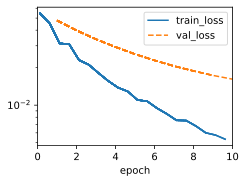

In [16]:
train_scratch(3)

L2 norm of w: 5.176885679247789e-05


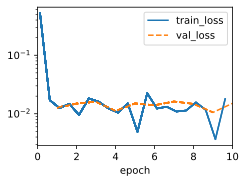

In [20]:
train_scratch(100) # higher lambda decreases L2 norm, observe that val_loss is very little

In [21]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

L2 norm of w: 0.014041300863027573


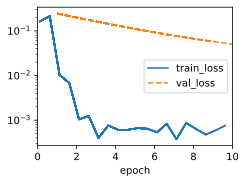

In [22]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

In [23]:
# summary:
# regularization is a common method for dealing with overfitting
# class regu add a penalty term to loss function to reduce complexity
# another is to use l2 penalty

In [28]:
# exercises
# 1. as lambda increase, the val_loss decreases. the train_loss also decreases very sharply at the beginning 
# 2. too small lambda overfits, too big lambda underfits
# 3. pass
# 4. pass
# 5. hold out portions of the data for validation. (K-fold cross validation)
# 6. pass

L2 norm of w: 0.000607266731094569


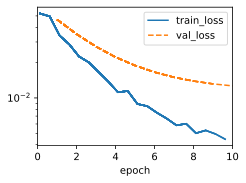

In [25]:
train_scratch(5)

L2 norm of w: 0.00012302417599130422


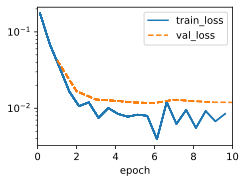

In [26]:
train_scratch(20)

L2 norm of w: 6.825434684287757e-05


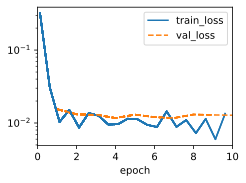

In [27]:
train_scratch(50)